# Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [3]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.shape

(60000, 785)

In [6]:
fashion_test_df.shape

(10000, 785)

In [7]:
training = np.array(fashion_train_df , dtype = 'float32')
testing = np.array(fashion_test_df , dtype = 'float32')

In [8]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
training.shape

(60000, 785)

# Visualising data

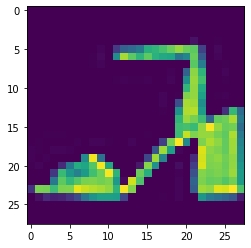

In [25]:
i = random.randint(1,60000)
plt.imshow(training[60, 1:].reshape(28,28))


In [26]:
label = training[i,0]
label


8.0

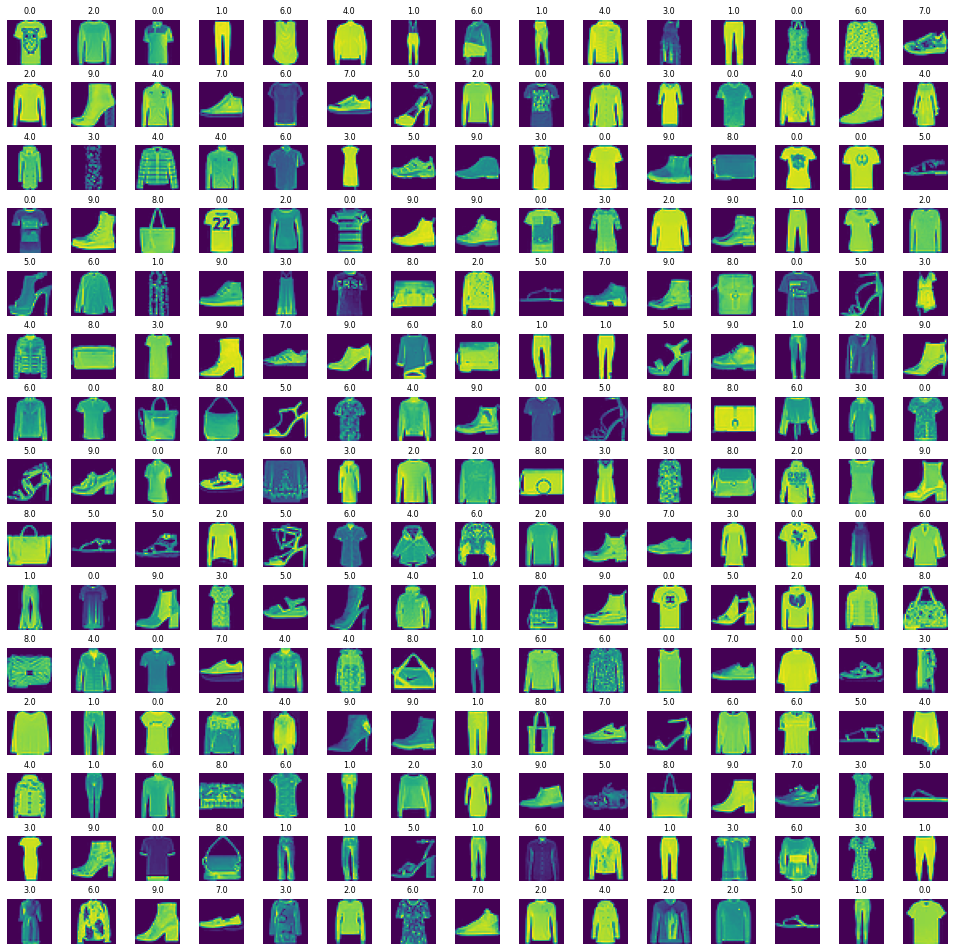

In [27]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()
n_training = len(training)
for i in np.arange(0, W_grid * L_grid): 

  
    index = np.random.randint(0, n_training)
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Training the DL model

In [28]:
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [30]:
from sklearn.model_selection import train_test_split
X_train , X_validate , y_train , y_validate = train_test_split(X_train , y_train , test_size = 0.2 , random_state  = 12345)

In [31]:
X_train.shape

(48000, 784)

In [34]:
X_test.shape

(10000, 784)

In [33]:
y_train.shape

(48000,)

In [35]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [36]:
X_train.shape

(48000, 28, 28, 1)

In [37]:
X_test.shape

(10000, 28, 28, 1)

In [38]:
X_validate.shape

(12000, 28, 28, 1)

In [39]:
import keras

In [42]:
#y_train = keras.utils.to_categorical(y_train, 10)
#y_test = keras.utils.to_categorical(y_test, 10)

In [70]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from keras.callbacks import TensorBoard


In [71]:
cnn_model = Sequential()


cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))


cnn_model.add(Flatten())
cnn_model.add(Dense( 32, activation = 'relu'))
cnn_model.add(Dense(10, activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='Adam',metrics =['accuracy'])

In [76]:
epochs = 50
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs =50,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))



Epoch 1/50
94/94 [==============================] - 4s 39ms/step - loss: 0.6804 - accuracy: 0.7530 - val_loss: 0.6025 - val_accuracy: 0.7821
Epoch 2/50
94/94 [==============================] - 4s 40ms/step - loss: 0.6010 - accuracy: 0.7819 - val_loss: 0.5593 - val_accuracy: 0.7932
Epoch 3/50
94/94 [==============================] - 4s 41ms/step - loss: 0.5618 - accuracy: 0.7952 - val_loss: 0.5211 - val_accuracy: 0.8146
Epoch 4/50
94/94 [==============================] - 4s 40ms/step - loss: 0.5337 - accuracy: 0.8064 - val_loss: 0.4982 - val_accuracy: 0.8230
Epoch 5/50
94/94 [==============================] - 4s 41ms/step - loss: 0.5145 - accuracy: 0.8136 - val_loss: 0.4837 - val_accuracy: 0.8292
Epoch 6/50
94/94 [==============================] - 4s 40ms/step - loss: 0.4991 - accuracy: 0.8170 - val_loss: 0.4699 - val_accuracy: 0.8307
Epoch 7/50
94/94 [==============================] - 4s 40ms/step - loss: 0.4835 - accuracy: 0.8236 - val_loss: 0.4572 - val_accuracy: 0.8347
Epoch 8/50
94

# Evaluatiing the  model

In [78]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3320 - accuracy: 0.8760
Test Accuracy : 0.876


In [80]:
predicted_classes = cnn_model.predict_classes(X_test)

C:\Users\amitd\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [82]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

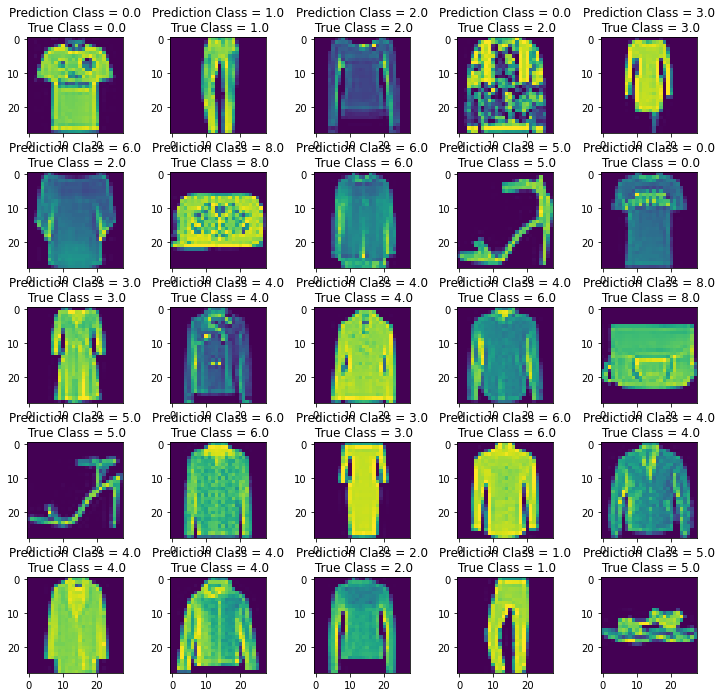

In [84]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('on')

plt.subplots_adjust(wspace=0.5)


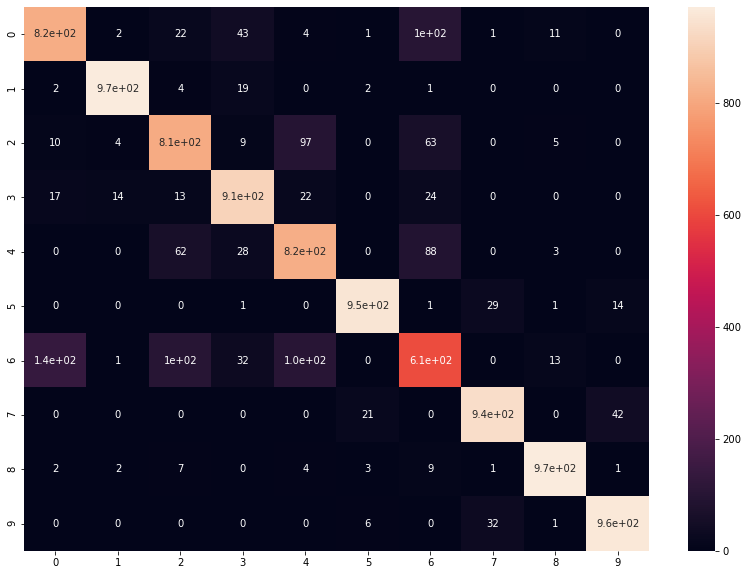

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [86]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.81      0.82      1000
     Class 1       0.98      0.97      0.97      1000
     Class 2       0.79      0.81      0.80      1000
     Class 3       0.87      0.91      0.89      1000
     Class 4       0.78      0.82      0.80      1000
     Class 5       0.97      0.95      0.96      1000
     Class 6       0.68      0.61      0.64      1000
     Class 7       0.94      0.94      0.94      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.87      0.88      0.87     10000
weighted avg       0.87      0.88      0.87     10000

